<a href="https://colab.research.google.com/github/manivinaygoud/6220-40219632/blob/main/INSE_6220_40219632.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Python Modules**

In [3]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy import stats
import seaborn as sns; sns.set()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from scipy.stats import beta
from scipy.stats import f
from sklearn.neighbors import KNeighborsClassifier
from tabulate import tabulate
from sklearn.preprocessing import label_binarize
from sklearn import svm
from numpy import linalg as LA
from sklearn.multiclass import OneVsRestClassifier

**Upload files into Colaboratory**

In [4]:
from google.colab import files
uploaded = files.upload()

Saving admission_updated.csv to admission_updated (2).csv


**Read the Dataset File**

In [5]:
df =pd.read_csv('admission_updated.csv')
df.columns
df.head(11)

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Chance of Admit,Class
0,337,118,4.5,4.5,9.65,0.92,1
1,324,107,4.0,4.5,8.87,0.76,1
2,316,104,3.0,3.5,8.00,0.72,1
3,322,110,3.5,2.5,8.67,0.80,1
4,314,103,2.0,3.0,8.21,0.65,0
5,330,115,4.5,3.0,9.34,0.90,1
6,321,109,3.0,4.0,8.20,0.75,1
7,308,101,3.0,4.0,7.90,0.68,0
8,302,102,2.0,1.5,8.00,0.50,0
9,323,108,3.5,3.0,8.60,0.45,0


In [6]:
df.head()

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Chance of Admit,Class
0,337,118,4.5,4.5,9.65,0.92,1
1,324,107,4.0,4.5,8.87,0.76,1
2,316,104,3.0,3.5,8.00,0.72,1
3,322,110,3.5,2.5,8.67,0.80,1
4,314,103,2.0,3.0,8.21,0.65,0


**Checking for null values**

In [7]:
df.dtypes
df.isnull().sum()
# no null values and hence no replacing
#df.fillna(df.mean(),inplace=True)
#df = df.dropna()

GRE Score           0
TOEFL Score         0
SOP                 0
LOR                 0
CGPA                0
Chance of Admit     0
Class               0
dtype: int64

**Classes**

In [8]:
Y= df['Class']
print(Y)

0      1
1      1
2      1
3      1
4      0
      ..
142    0
143    0
144    0
145    0
146    0
Name: Class, Length: 147, dtype: int64


In [9]:
Y= df['Class']
df.drop(['Class',],axis=1,inplace=True)

** Representing the Count of Date Types**

<Axes: title={'center': 'Count of different varieties of Dates'}>

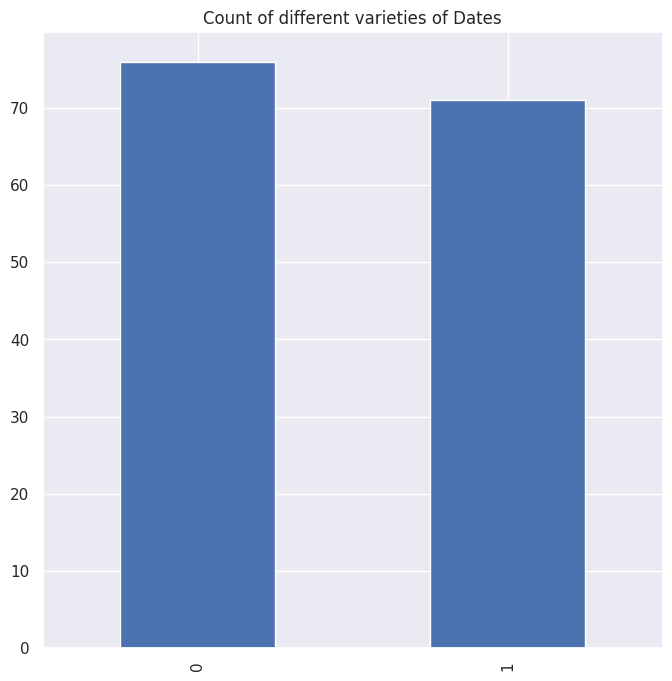

In [10]:
plt. figure(figsize=(8,8))
plt.title("Count of different varieties of Dates")
Y.value_counts().plot(kind = 'bar')

**Normalizing the data**

In [11]:
df = (df - df.mean())/df.std()
# Displaying DataFrame columns.
df.columns
# Some basic information about each column in the DataFrame 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GRE Score         147 non-null    float64
 1   TOEFL Score       147 non-null    float64
 2   SOP               147 non-null    float64
 3   LOR               147 non-null    float64
 4   CGPA              147 non-null    float64
 5   Chance of Admit   147 non-null    float64
dtypes: float64(6)
memory usage: 7.0 KB


**Observations and variables**

In [12]:
observations = list(df.index)
print(observations)
variables = list(df.columns)
print(variables)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146]
['GRE Score', 'TOEFL Score', 'SOP', 'LOR ', 'CGPA', 'Chance of Admit ']


**Data Visualisation**

*Visualisation of the data using a box plot*

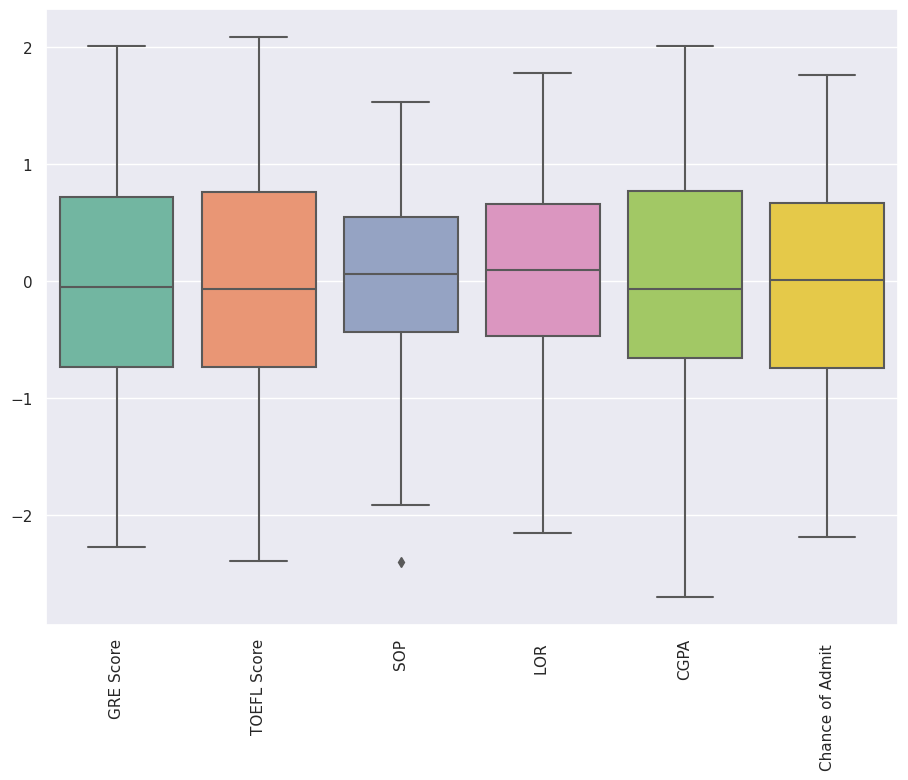

In [13]:
sns.set(rc={'figure.figsize':(11,8)}, font_scale=1)
ax=sns.boxplot(data=df, orient="v", palette="Set2")
plt.setp(ax.get_xticklabels(),rotation=90)
plt.show()

*Stripplot to show the datapoints on top of the boxes*

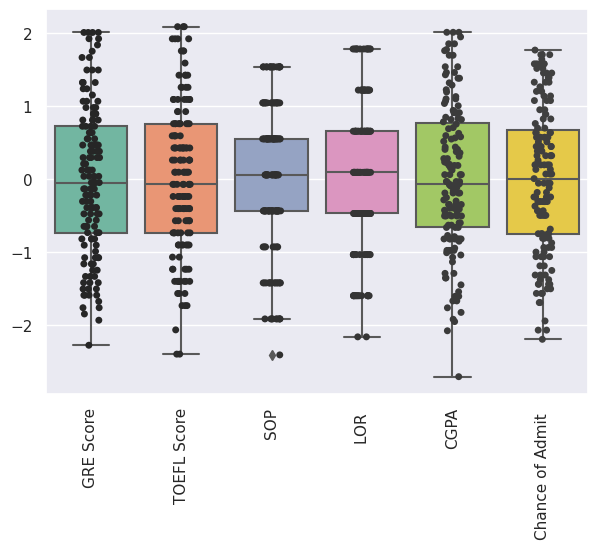

In [14]:
sns.set(rc={'figure.figsize':(7,5)}, font_scale=1)
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax = sns.stripplot(data=df, color=".25")
plt.setp(ax.get_xticklabels(),rotation=90)
plt.show()

*Pairplot*

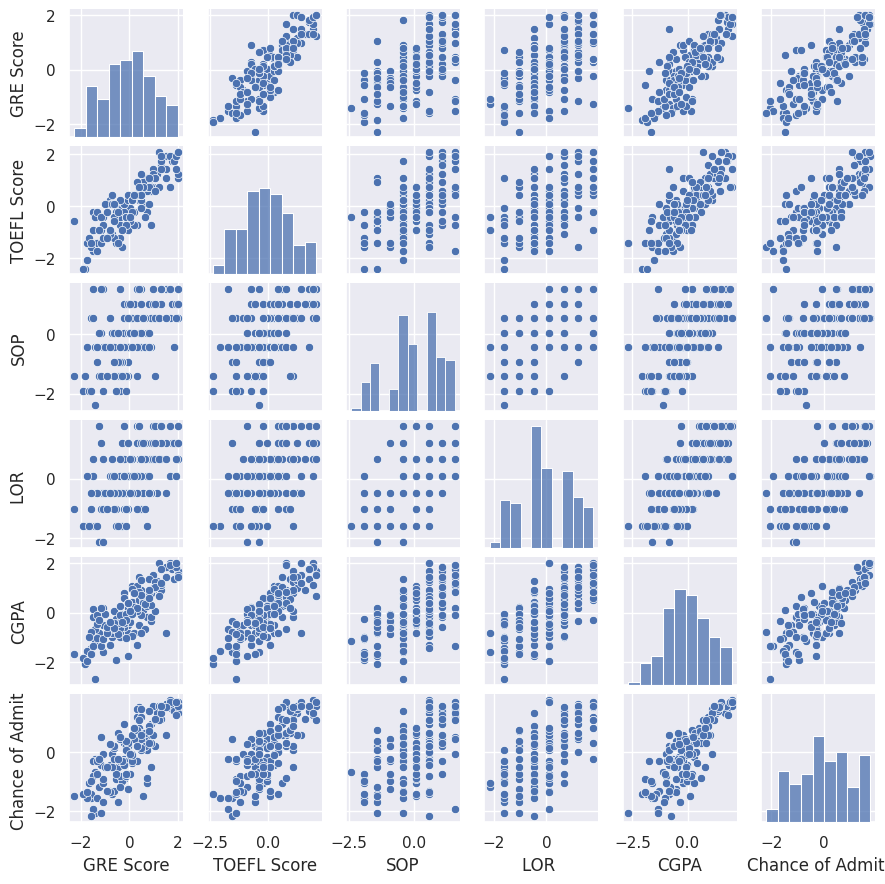

In [15]:
g=sns.pairplot(df,height=1.5)

**Covariance**

Text(0.5, 1.0, 'Covariance matrix')

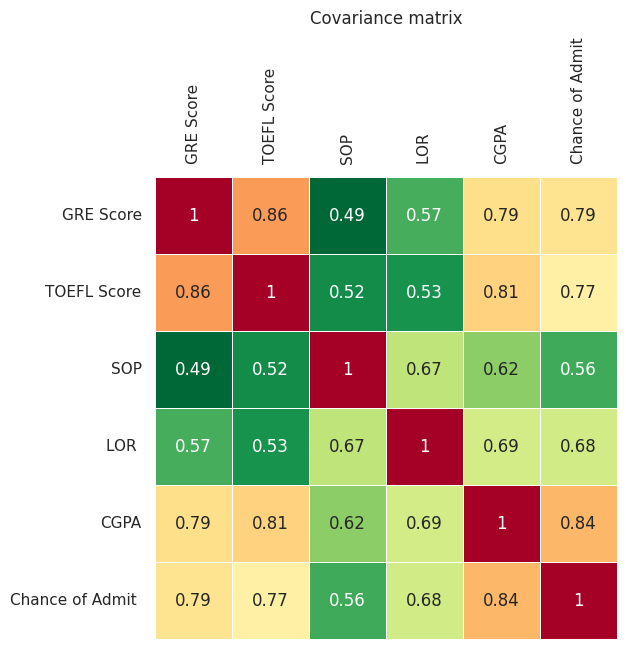

In [16]:
dfc = df - df.mean() #centered data
plt. figure(figsize=(6,6))
ax = sns.heatmap(dfc.cov(), cmap='RdYlGn_r', linewidths=0.5, annot=True, 
            cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
plt.setp(ax.get_xticklabels(),rotation=90)
plt.title('Covariance matrix')

In [17]:
#calculating Eigen vectors & eigen values
w, v = LA.eig(dfc.cov())

In [18]:
#eigen values
w

array([4.41740136, 0.72533385, 0.35759931, 0.20992158, 0.12794123,
       0.16180268])

In [19]:
#eigen vectors
v

array([[-0.42024108, -0.39560065, -0.06927602, -0.4368849 , -0.58703346,
         0.35583941],
       [-0.41994283, -0.38054799, -0.30424396, -0.28227196,  0.68422001,
        -0.19604177],
       [-0.34898884,  0.64910277, -0.64854863,  0.07167988, -0.06500065,
         0.16399381],
       [-0.3782674 ,  0.50471891,  0.62885793, -0.4290828 ,  0.12908915,
        -0.07703405],
       [-0.44188152, -0.08649571,  0.04434745,  0.37737802, -0.35225929,
        -0.72718068],
       [-0.43232712, -0.12298887,  0.29084726,  0.63070587,  0.20556992,
         0.52280587]])

**Principal component analysis**

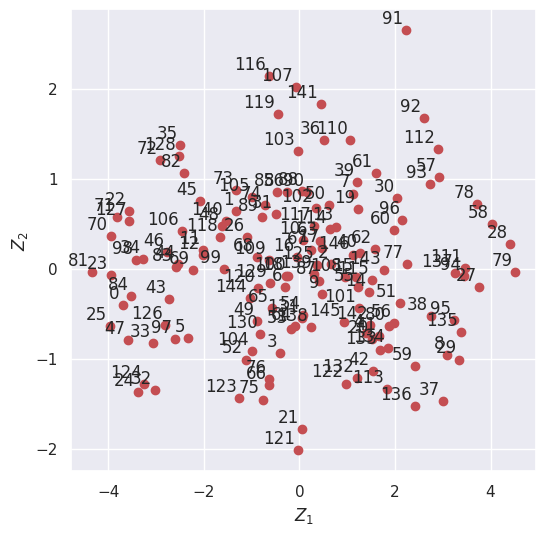

In [20]:
pca = PCA()
pca.fit(df)
Z = pca.fit_transform(df)
plt. figure(figsize=(6,6))
plt.scatter(Z[:,0], Z[:,1], c='r')
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for label, x, y in zip(observations, Z[:,0], Z[:,1]):
    plt.annotate(label, xy=(x, y), xytext=(-2, 2),
        textcoords='offset points', ha='right', va='bottom')

**Eigenvectors**

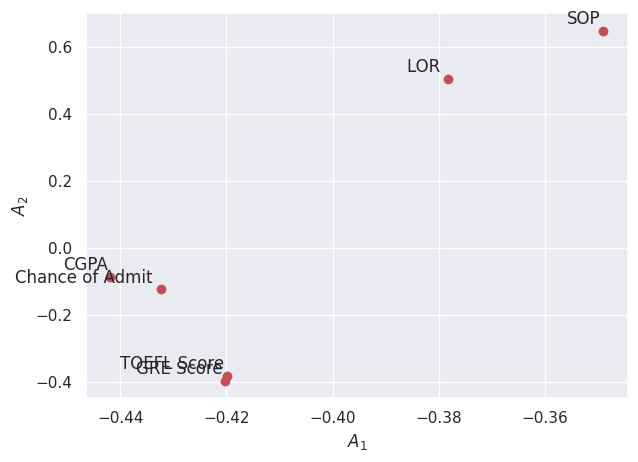

In [21]:
A = pca.components_.T
#print(A.round(4))
plt. figure()
plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$');
for label, x, y in zip(variables, A[:,0],A[:,1]):
    plt.annotate(label, xy=(x, y), xytext=(-2, 2),
        textcoords='offset points', ha='right', va='bottom')

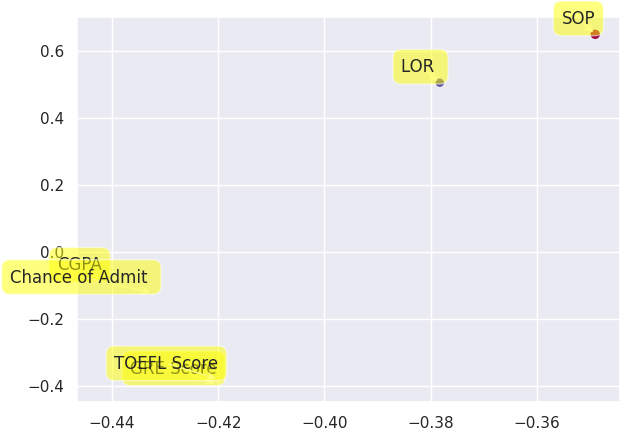

In [22]:
plt. figure()
plt.scatter(A[:,0],A[:,1],marker='o',c=A[:,2],s=A[:,1]*50,
    cmap=plt.get_cmap('Spectral'))
for label, x, y in zip(variables,A[:,0],A[:,1]):
    plt.annotate(label,xy=(x, y), xytext=(0, 5),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree Plot**

Text(0, 0.5, 'Explained variance')

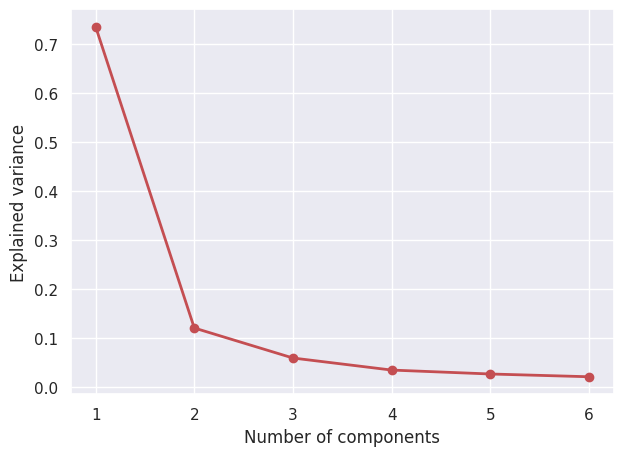

In [23]:
#Eigenvalues
Lambda = pca.explained_variance_
#Scree plot
plt. figure()
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=2)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

**Explained variance**

[73.6 12.1  6.   3.5  2.7  2.1]


Text(0, 0.5, 'Cumulative explained variance')

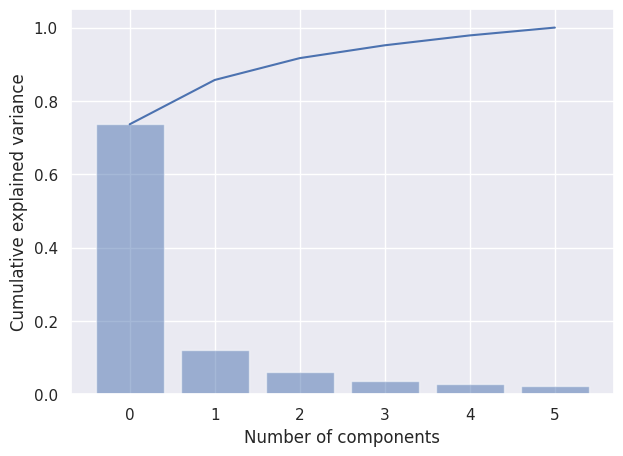

In [24]:
#Explained variance
ell = pca.explained_variance_ratio_
print(ell.round(3)*100)
plt. figure()
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

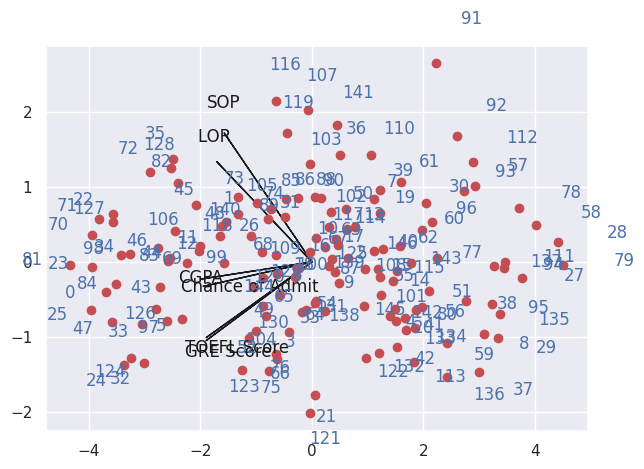

In [25]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0]
A2 = A[:,1]
Z1 = Z[:,0]
Z2 = Z[:,1]

plt. figure()
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
    plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2),
              color='k', width=0.0005, head_width=0.0025)
    plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')
    
for i in range(len(Z1)):
# circles project documents (ie rows from csv) as points onto PC axes
    plt.scatter(Z1[i], Z2[i], c='r', marker='o')
    plt.text(Z1[i]*1.2, Z2[i]*1.2, observations[i], color='b')

**Principal Components**

Text(0.5, 1.0, 'Principal components')

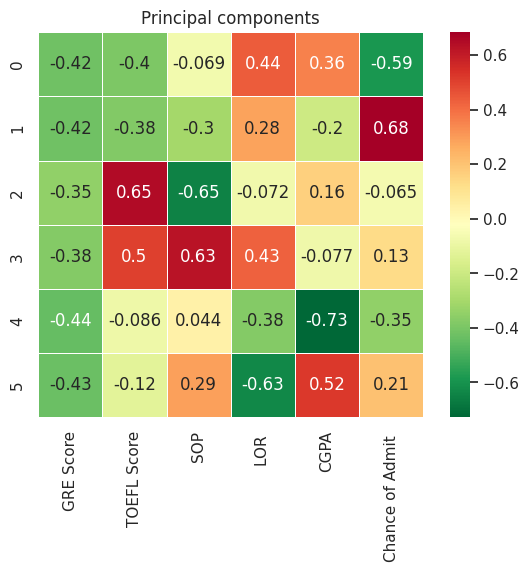

In [26]:
comps = pd.DataFrame(A,columns = variables)
sns.heatmap(comps,cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=True, 
            square=True)
ax.tick_params(labelbottom=False,labeltop=True)
plt.title('Principal components')

**Hotelling's T2 test**

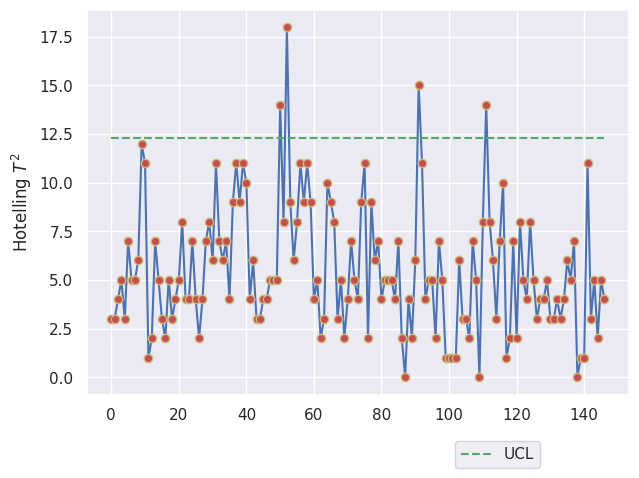

In [27]:
alpha = 0.05
p=Z.shape[1]
n=Z.shape[0]

UCL=((n-1)**2/n )*beta.ppf(1-alpha, p / 2 , (n-p-1)/ 2)
UCL2=p*(n+1)*(n-1)/(n*(n-p) )*f.ppf(1-alpha, p , n-p)
Tsquare=np.array([0]*Z.shape[0])
for i in range(Z.shape[0]):
  Tsquare[i] = np.matmul(np.matmul(np.transpose(Z[i]),np.diag(1/Lambda)) , Z[i])

fig, ax = plt.subplots()
ax.plot(Tsquare,'-b', marker='o', mec='y',mfc='r' )
ax.plot([UCL for i in range(len(Z1))], "--g", label="UCL")
plt.ylabel('Hotelling $T^2$')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))

**Out of control points**

In [28]:
print (np.argwhere(Tsquare>UCL))

[[ 50]
 [ 52]
 [ 91]
 [111]]


**Control Charts for Principal Components**

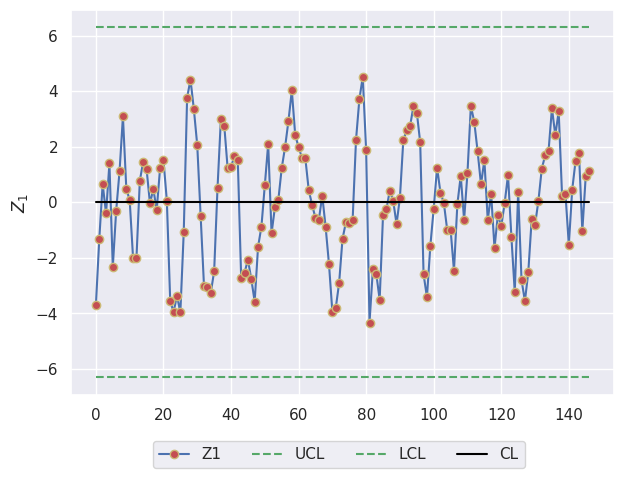

In [29]:
fig, ax = plt.subplots()
ax.plot(Z1,'-b', marker='o', mec='y',mfc='r' , label="Z1")
ax.plot([3*np.sqrt(Lambda[0]) for i in range(len(Z1))], "--g", label="UCL")
ax.plot([-3*np.sqrt(Lambda[0]) for i in range(len(Z1))], "--g", label='LCL')
ax.plot([0 for i in range(len(Z1))], "-", color='black',label='CL')
plt.ylabel('$Z_1$')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))

**Classification**

In [30]:
#Accuracy of the dataset with two classification algorithms

KNN_model = KNeighborsClassifier(n_neighbors=5)
scoring=['accuracy']
scores_knn_full_data =cross_validate(KNN_model, df,Y,cv=5, scoring=scoring)
scores_knn_Z = cross_validate(KNN_model,Z, Y,cv=5, scoring=scoring)
scores_knn_Z12 = cross_validate(KNN_model, Z[:,:2], Y,cv=5, scoring=scoring)

gnb = GaussianNB()
scores_gnb_full_data = cross_validate(gnb, df, Y,cv=5, scoring=scoring)
scores_gnb_Z = cross_validate(gnb, Z, Y,cv=5, scoring=scoring)
scores_gnb_Z12 = cross_validate(gnb, Z[:,:2], Y,cv=5, scoring=scoring)

scores_dict={}
for i in ['fit_time','test_accuracy']:
  scores_dict["gnb_full_data " + i ]=scores_gnb_full_data[i]
  scores_dict["gnb_Z " + i ]=scores_gnb_Z[i]
  scores_dict["gnb_Z12 " + i ]=scores_gnb_Z12[i]
  scores_dict["knn_full_data " + i ]=scores_knn_full_data[i]
  scores_dict["knn_Z " + i ]=scores_knn_Z[i]
  scores_dict["knn_Z12 " + i ]=scores_knn_Z12[i]

scores_data=pd.DataFrame(scores_dict)
print(scores_data)

   gnb_full_data fit_time  gnb_Z fit_time  gnb_Z12 fit_time  \
0                0.003505        0.002399          0.001709   
1                0.003316        0.001774          0.001230   
2                0.003220        0.003749          0.001407   
3                0.002862        0.001798          0.001293   
4                0.002970        0.001286          0.001407   

   knn_full_data fit_time  knn_Z fit_time  knn_Z12 fit_time  \
0                0.009757        0.001453          0.001212   
1                0.002858        0.001298          0.001213   
2                0.003793        0.001223          0.001371   
3                0.003600        0.001230          0.001337   
4                0.003158        0.001325          0.001298   

   gnb_full_data test_accuracy  gnb_Z test_accuracy  gnb_Z12 test_accuracy  \
0                     0.700000             0.700000               0.766667   
1                     0.600000             0.533333               0.633333   
2       

**Confusion Matrix**

In [32]:
#Confusion matrix for Naive Bayes classification algorithm
X_train, X_test, y_train, y_test = train_test_split(df, Y, test_size=0.2)
gnb= GaussianNB()
gnb.fit(X_train, y_train)
gnb_prediction=gnb.predict(X_test)
cm=confusion_matrix(gnb_prediction, y_test)
cm_df=pd.DataFrame(cm,index=['0','1'],
                  columns=['0','1'])

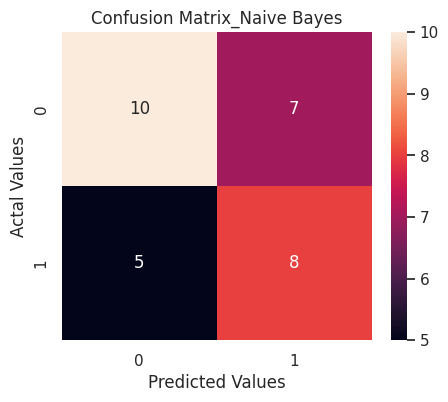

In [33]:
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix_Naive Bayes')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [34]:
#Confusion matrix for k-NN classification algorithm
KNN_model.fit(X_train, y_train)
KNN_prediction = KNN_model.predict(X_test)
cm=confusion_matrix(KNN_prediction, y_test)
cm_df=pd.DataFrame(cm,index=['0','1'],
                  columns=['0','1'])

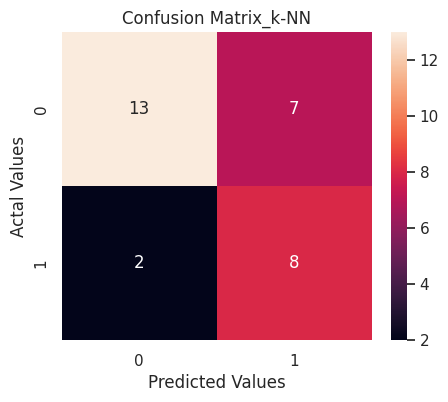

In [35]:
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix_k-NN')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

**Bar Chart**

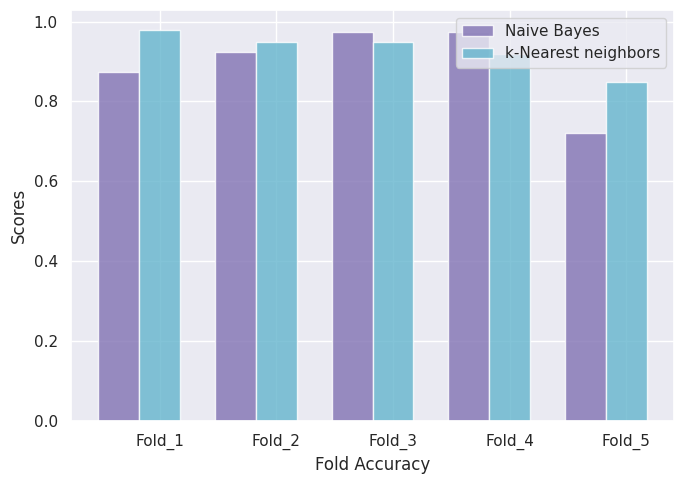

In [36]:
n_groups =5
KNN = (0.98, 0.95, 0.95, 0.92,0.85)
NB = (0.875, 0.925, 0.975, 0.975,0.72)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, NB, bar_width,
alpha=opacity,
color='m',
label='Naive Bayes')

rects2 = plt.bar(index + bar_width,KNN, bar_width,
alpha=opacity,
color='c',
label='k-Nearest neighbors')

plt.xlabel('Fold Accuracy')
plt.ylabel('Scores')
plt.xticks(index + bar_width, ('Fold_1', 'Fold_2', 'Fold_3', 'Fold_4','Fold_5'))
plt.legend()

plt.tight_layout()
plt.show()